In [58]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv("D:\Lectures\England\DAV\Report\dataset\sensing\phonelock\phonelock_u00.csv")
#table.head()
for row in table.iterrows():
    table['start'] = table['start'].replace(row[1][0],datetime.fromtimestamp(row[1][0]))
    table['end'] = table['end'].replace(row[1][1],datetime.fromtimestamp(row[1][1]))
    

In [59]:
table['Time in Locked Mode'] = table['end'] - table['start']


In [60]:
table['start'].count()

226

In [61]:
table['Time in Locked Mode'] = table['Time in Locked Mode'].dt.total_seconds()
#pd.to_datetime(table['Time in Locked Mode'])
#type(table['Time in Locked Mode'])
#table.head()
x= table['Time in Locked Mode']
#print(table.dtypes)

In [62]:
time_in_sec= []
for i in range(table['start'].count()):
    time_in_sec.append(x[i])
    #print(x[i].total_seconds())

In [63]:
#table['Locked time in Seconds'] = time_in_sec
table.head()

,start,end,Time in Locked Mode
0,2013-03-27 04:36:32,2013-03-27 06:13:27,5815.0
1,2013-03-27 06:26:05,2013-03-27 10:58:53,16368.0
2,2013-03-27 12:12:13,2013-03-27 13:30:08,4675.0
3,2013-03-27 17:46:18,2013-03-27 19:04:09,4671.0
4,2013-03-27 23:05:58,2013-03-28 00:11:11,3913.0


In [64]:
Date = []
Temp = table['start']
for i in range(table['start'].count()):
    Date.append(Temp[i].strftime("%d %b %y"))
    

In [65]:
table['Date']=Date

In [66]:
table.index = table['Date']

In [67]:
table

,start,end,Time in Locked Mode,Date
Date,,,,
27 Mar 13,2013-03-27 04:36:32,2013-03-27 06:13:27,5815.0,27 Mar 13
27 Mar 13,2013-03-27 06:26:05,2013-03-27 10:58:53,16368.0,27 Mar 13
27 Mar 13,2013-03-27 12:12:13,2013-03-27 13:30:08,4675.0,27 Mar 13
27 Mar 13,2013-03-27 17:46:18,2013-03-27 19:04:09,4671.0,27 Mar 13
27 Mar 13,2013-03-27 23:05:58,2013-03-28 00:11:11,3913.0,27 Mar 13
...,...,...,...,...
31 May 13,2013-05-31 12:17:59,2013-05-31 13:22:51,3892.0,31 May 13
31 May 13,2013-05-31 14:08:03,2013-05-31 15:37:43,5380.0,31 May 13
31 May 13,2013-05-31 18:51:02,2013-05-31 19:53:38,3756.0,31 May 13


In [68]:
P = table.groupby(table.index)['Time in Locked Mode']
P.head()

Date
27 Mar 13     5815.0
27 Mar 13    16368.0
27 Mar 13     4675.0
27 Mar 13     4671.0
27 Mar 13     3913.0
              ...   
31 May 13     3864.0
31 May 13    31512.0
31 May 13     3892.0
31 May 13     5380.0
31 May 13     3756.0
Name: Time in Locked Mode, Length: 213, dtype: float64

In [69]:
datewise_inlocktime = P.sum()/3600

In [70]:
#P.head()

In [71]:
datewise_inlocktime.columns = ['Locked Time in Hours']

In [72]:
inlocktime = datewise_inlocktime.to_frame()

In [73]:
inlocktime['User']= 50

In [74]:
inlocktime.to_csv(r"C:\Users\muhad\DAV\formerge\Phone_Lock\lock_50.csv",index=True ,encoding='utf-8-sig')

# Playing With Processed Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv(r"C:\Users\muhad\DAV\formerge\Phone_Lock\combined_phonelock.csv")
table['Date'] = pd.to_datetime(table['Date'], infer_datetime_format=True)
table.sort_values(by=['Date'])
#[["timestamp", "MESSAGES_date", "MESSAGES_subject", "MESSAGES_type", "MESSAGES_status"]]
table.head()

,Date,User,Time in Locked Mode
0,2013-04-01,1,4.519167
1,2013-05-01,1,10.070278
2,2013-04-02,1,9.668889
3,2013-05-02,1,1.141667
4,2013-04-03,1,13.371389


In [2]:
grtable = table.groupby(['User','Date'])
grtable.first()

Time in Locked Mode
User Date                           
1    2013-03-27             9.845000
     2013-03-28             1.356667
     2013-03-29            11.245278
     2013-03-30             7.386667
     2013-03-31            21.444167
...                              ...
49   2013-05-27             6.720000
     2013-05-28             5.759444
     2013-05-29             2.726944
     2013-05-30            10.003611
     2013-05-31             6.670278

[2532 rows x 1 columns]

In [3]:
type(grtable)

pandas.core.groupby.generic.DataFrameGroupBy

In [4]:
test = grtable.aggregate(np.sum)
test

Time in Locked Mode
User Date                           
1    2013-03-27             9.845000
     2013-03-28             1.356667
     2013-03-29            11.245278
     2013-03-30             7.386667
     2013-03-31            21.444167
...                              ...
49   2013-05-27             6.720000
     2013-05-28             5.759444
     2013-05-29             2.726944
     2013-05-30            10.003611
     2013-05-31             6.670278

[2532 rows x 1 columns]

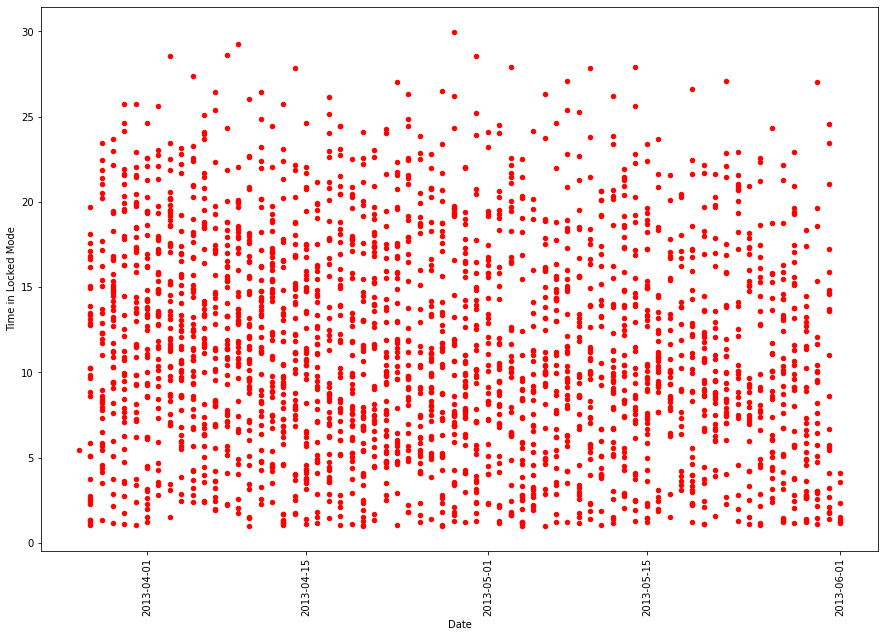

In [5]:
table.plot(kind='scatter',x='Date',y='Time in Locked Mode',color='red', figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [6]:
test

Time in Locked Mode
User Date                           
1    2013-03-27             9.845000
     2013-03-28             1.356667
     2013-03-29            11.245278
     2013-03-30             7.386667
     2013-03-31            21.444167
...                              ...
49   2013-05-27             6.720000
     2013-05-28             5.759444
     2013-05-29             2.726944
     2013-05-30            10.003611
     2013-05-31             6.670278

[2532 rows x 1 columns]

In [7]:
table['Phone Usage'] = 24 - table['Time in Locked Mode']

In [8]:
table

,Date,User,Time in Locked Mode,Phone Usage
0,2013-04-01,1,4.519167,19.480833
1,2013-05-01,1,10.070278,13.929722
2,2013-04-02,1,9.668889,14.331111
3,2013-05-02,1,1.141667,22.858333
4,2013-04-03,1,13.371389,10.628611
...,...,...,...,...
2527,2013-04-30,49,3.697500,20.302500
2528,2013-03-30,49,9.852222,14.147778
2529,2013-05-30,49,10.003611,13.996389
2530,2013-03-31,49,19.786389,4.213611


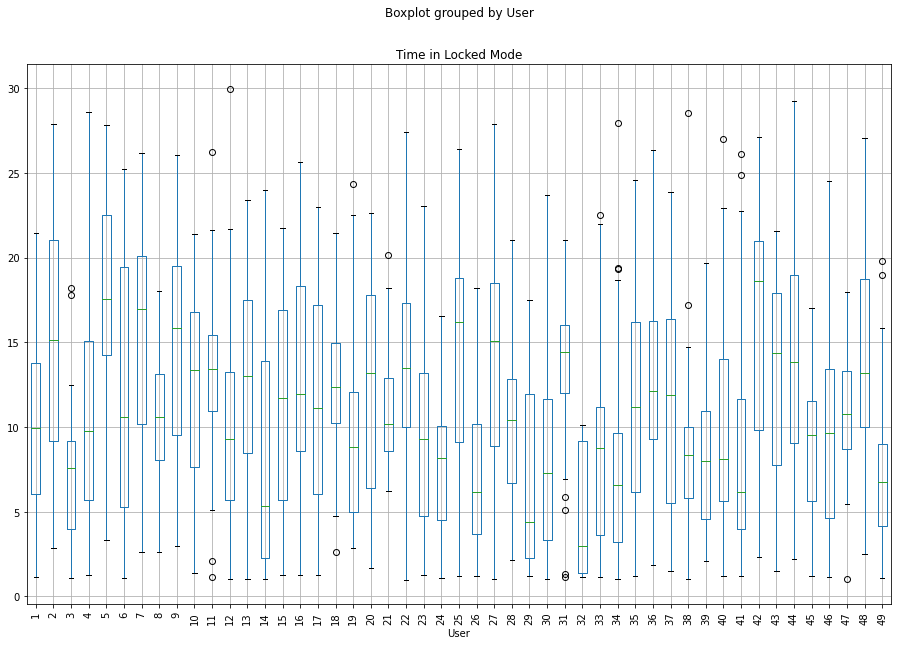

In [105]:
test.boxplot('Time in Locked Mode', by = 'User', figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [9]:
phone_usage = table.groupby(by=["User"], dropna=False).sum()

In [11]:
phone_usage = phone_usage.drop(['Time in Locked Mode'], axis=1)

In [12]:
phone_usage

,Phone Usage
User,
1,845.260000
2,510.178611
3,1063.928611
4,515.248889
5,348.536389
6,675.122778
7,373.266944
8,832.249444
9,563.438889


In [16]:
phone_usage.to_csv(r'C:\Users\muhad\DAV\Level_2\phone_usage.csv', index = True)